<a href="https://colab.research.google.com/github/Ognjen78/PPPO/blob/main/PPPO_Projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uvod**

U obradi digitalnih slika, često je potrebno izvršiti različite transformacije i predobrade kako bi se poboljšala kvaliteta slike ili pripremili podaci za dalju analizu. U ovom projektu se bavimo nekoliko važnih tehnika: transformacija iz RGB u Lab prostor boja, histogram equalizacija, dodavanje šuma i njegovo uklanjanje korišćenjem autoenkodera, i konverzija RLE kodova u binarne maske.

**Detekcija objekata**

Detekcija objekata predstavlja ključnu komponentu računarske vizije koja omogućava sistemima da automatski identifikuju, lokalizuju i klasifikuju objekte u digitalnim slikama ili video zapisima. Ova tehnologija ima široku primenu u različitim oblastima, uključujući autonomna vozila, video nadzor, medicinsku dijagnostiku, industrijsku automatizaciju i mnoge druge.[7]

Osnovni koncepti detekcije objekata: Detekcija objekata se sastoji od dva osnovna koraka - lokalizacije i klasifikacije.

Lokalizacija se odnosi na identifikaciju tačnog položaja objekta u slici, dok se klasifikacija bavi određivanjem vrste ili identiteta objekta. Ovi koraci čine osnovu za razvoj složenijih sistema detekcije objekata.

*    Tradicionalni pristupi: Tradicionalni pristupi detekciji objekata obično uključuju ručno projektovane karakteristike i algoritme, kao što su Haar kaskade ili Histogram orijentisanih gradijenata. Ovi pristupi su efikasni u određenim situacijama, ali često pokazuju ograničenja u složenijim scenarijima.

*    Konvolucione neuralne mreže (CNN): Sa razvojem dubokog učenja, konvolucione neuralne mreže su postale dominantna tehnologija u detekciji objekata. Modeli poput Faster R-CNN, YOLO (You Only Look Once) i SSD (Single Shot MultiBox Detector) su popularni zbog svoje sposobnosti da istovremeno izvrše lokalizaciju i klasifikaciju objekata sa visokim stepenom tačnosti.

*    Transferno učenje: Transferno učenje je takođe postao važan pristup u detekciji objekata, gde se prethodno obučeni modeli koriste kao osnova za treniranje novih modela specifičnih za određeni zadatak. Ova tehnika omogućava bolje performanse čak i kada je dostupan mali skup podataka za treniranje.

*   Detekcija objekata u realnom vremenu: Detekcija objekata u realnom vremenu postavlja dodatne izazove, uključujući brzinu i efikasnost. Pristupi poput MobileNet i EfficientDet su posebno prilagođeni za rad u resursno ograničenim okruženjima, čime omogućavaju brzu obradu slika ili videa u stvarnom vremenu.




Detekcija objekata u računarskoj viziji je oblast koja se neprestano razvija, a primena novih tehnologija kao što su duboko učenje i transferno učenje omogućava postizanje visokih performansi u različitim scenarijima. Raznolikost pristupa i tehnika omogućava inženjerima da prilagode detekciju objekata prema specifičnim zahtevima njihovih projekata. Ovaj rad pruža pregled ključnih aspekata detekcije objekata, ističući najnovije tehnologije koje se koriste u ovoj oblasti.




**Transformacija iz RGB u Lab prostor boja**


RGB (Red, Green, Blue) je najčešće korišćeni prostor boja za prikazivanje slika na ekranima. Međutim, RGB prostor boja nije perceptivno uniforman, što znači da promene u boji u ovom prostoru ne odgovaraju uvek promjenama koje bi ljudsko oko primetilo. Lab prostor boja (Lab*) je dizajniran da bude perceptivno uniforman i često se koristi u obradi slika za različite analize boja i prilagođavanja.

Transformacija iz RGB u Lab prostor boja uključuje sledeće korake:

*   Konverzija iz RGB u XYZ prostor boja.
*   Konverzija iz XYZ u Lab prostor boja.
*   Histogram equalizacija

Histogram equalizacija je tehnika koja se koristi za poboljšanje kontrasta slike. Ona redistribuira vrednosti piksela tako da histogram rezultujuće slike bude približno ravnomeran. Ovo može pomoći u isticanju detalja u slikama koje imaju loš kontrast, na primer, tamne slike ili slike sa slabim osvetljenjem.

Histogram equalizacija se obično primenjuje na L kanal u Lab prostoru boja, jer ovaj kanal predstavlja osvetljenost slike. Proces uključuje sledeće korake:

*   Izračunavanje histograma osvetljenosti.
*   Primenjivanje kumulativne distribucione funkcije (CDF) na histogram.
*   Mapiranje originalnih vrednosti piksela na nove vrednosti zasnovane na CDF.


**Otklanjanje šuma korišćenjem autoenkodera**


Dodavanje šuma slikama je česta tehnika u obuci modela za uklanjanje šuma (denoising). Šum može nastati iz različitih izvora kao što su loša osvetljenost, senke, ili elektronski šum senzora kamere. Autoenkoderi su vrsta neuronskih mreža koje se koriste za kompresiju i rekonstrukciju podataka, i mogu se koristiti za uklanjanje šuma iz slika.

Proces uključuje sledeće korake:

*   Učitavanje slika i dodavanje šuma.
*   Obuka autoenkodera na noisy slikama (ulaz) i originalnim slikama (izlaz).
*   Primena obučenog autoenkodera na noisy slike za dobijanje denoised slika.



**Pretvaranje RLE kodova u binarne maske**


Run-length encoding (RLE) je tehnika kompresije koja predstavlja nizove podataka korišćenjem parova vrednosti i dužina. U kontekstu obrade slika, RLE se često koristi za kompresiju binarnih maski koje označavaju područja interesa (npr. objekti na slici).

Pretvaranje RLE kodova u binarne maske uključuje sledeće korake:

*   Parsiranje RLE stringa da bi se dobili parovi (početak, dužina).
*   Kreiranje prazne binarne maske odgovarajuće veličine.
*   Popunjavanje binarne maske na osnovu RLE parova.

**Opis projektnog zadatka**

Cilj projekta je razviti model za detekciju i klasifikaciju brodova na fotografijama snimljenim iz ptičje perspektive. Glavni zadatak je predviđanje lokacije broda na svakoj slici, a ove informacije mogu doprineti praćenju brodova iz vazduha. Dataset koji će se koristiti za ovaj projekat sastoji se od slika koje su označene sa ili bez prisustva brodova, kao i sa jednim ili više brodova na slici, različito raspoređenih.

Struktura dataset-a:

train_v2 folder: Ovaj folder sadrži slike koje će biti korišćene za treniranje modela. Ukupno, dataset ima 44,533 slike.

test_v2 folder: Sadrži slike koje će se koristiti za testiranje modela. Cilj je detektovati prisustvo brodova na ovim slikama. U ovom folderu se nalazi 6,872 slike.

train_ship_segmentations_v2.csv: CSV fajl koji sadrži podatke za obuku. Sastoji se od dve kolone: "ImageId" koja identifikuje jedinstveni ID slike, i "EncodedPixels" koja sadrži informacije o segmentaciji brodova.

sample_submission_v2.csv: Primer formata fajla koji se očekuje kao rešenje zadatka. Ovaj fajl služi kao referenca za format u kojem treba dostaviti predviđanja.

Realizacija zadatka zahteva razvoj modela za detekciju objekata na slikama, sa posebnim fokusom na brodove. Kao ulaz koristiće se slike iz train_v2 foldera, dok će se performanse modela evaluirati na test_v2 slikama. Rezultati će biti predstavljeni u formatu sličnom sample_submission_v2.csv.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

folder_path = '/content/drive/MyDrive/Ships_Detection.rar'
# Provera da li putanja postoji
if os.path.exists(folder_path):
    print(f"Folder path: {folder_path}")
else:
    print("Path does not exist.")

Folder path: /content/drive/MyDrive/Ships_Detection.rar


In [ ]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!unrar x /content/drive/MyDrive/Ships_Detection.rar -d /content/Ships_Detection/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Ships_Detection.rar


Would you like to replace the existing file /content/Ships_Detection/Ships_Detection/sample_submission_v2.csv
280930 bytes, modified on 2019-12-15 21:49
with a new one
280930 bytes, modified on 2019-12-15 21:49

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
# Provera sadržaja ekstraktovanog direktorijuma
extracted_folder_path = '/content/Ships_Detection/'
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)


['Ships_Detection']


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Postavljanje putanja do foldera sa slikama
train_images_path = "/content/Ships_Detection/Ships_Detection/train_v2/"
test_images_path = "/content/Ships_Detection/Ships_Detection/test_v2/"


**Ova ćelija učitava slike iz trening seta i pretvara ih iz RGB u Lab prostor boja. Lab prostor boja se često koristi u obradi slika zbog bolje separacije informacija o osvetljenju (L kanal) i boji (A i B kanali). Ovo može pomoći u različitim zadacima obrade slike, kao što je poboljšanje kontrasta.**

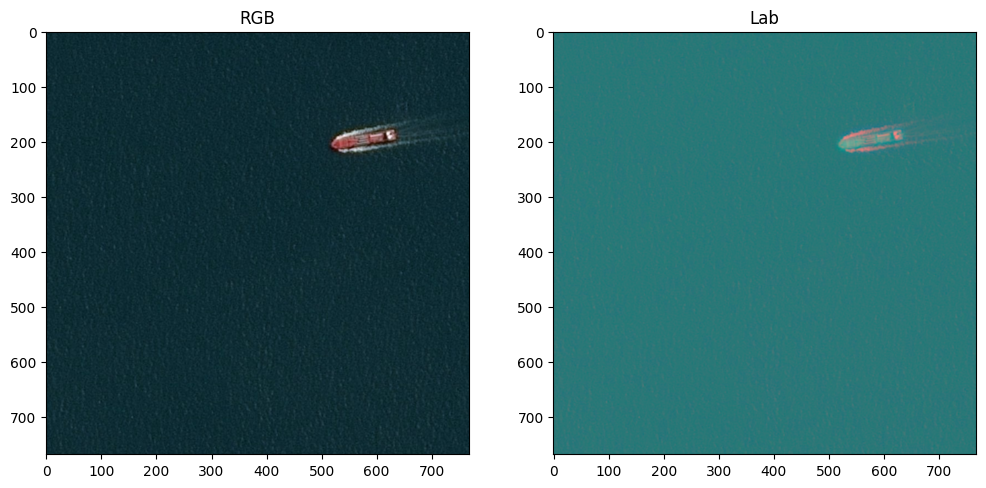

In [ ]:
def rgb_to_lab(image_path):
    # Učitavanje slike u RGB prostoru boja
    image_rgb = io.imread(image_path)
    # Transformacija iz RGB u Lab prostor boja
    image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB) #Koristi se cvtColor funkcija iz cv2 (OpenCV) biblioteke za konverziju slike iz RGB prostora boja u Lab prostor boja.
    return image_lab

# Primer učitavanja i prikaza slike pre i posle transformacije
image_path = train_images_path + "0bdbed88b.jpg"
image_lab = rgb_to_lab(image_path)

# Prikaz slike u RGB i Lab prostoru boja
image_rgb = io.imread(image_path)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("RGB")
plt.subplot(1, 2, 2)
plt.imshow(image_lab)
plt.title("Lab")
plt.show()




**U ovoj ćeliji se primenjuje equalizacija histograma na L kanal Lab slike. Equalizacija histograma je tehnika koja poboljšava kontrast slike raspodelom intenziteta. To čini tako što se intenziteti piksela redistribuiraju tako da se intenziteti raspodele što je moguće ravnomernije.**

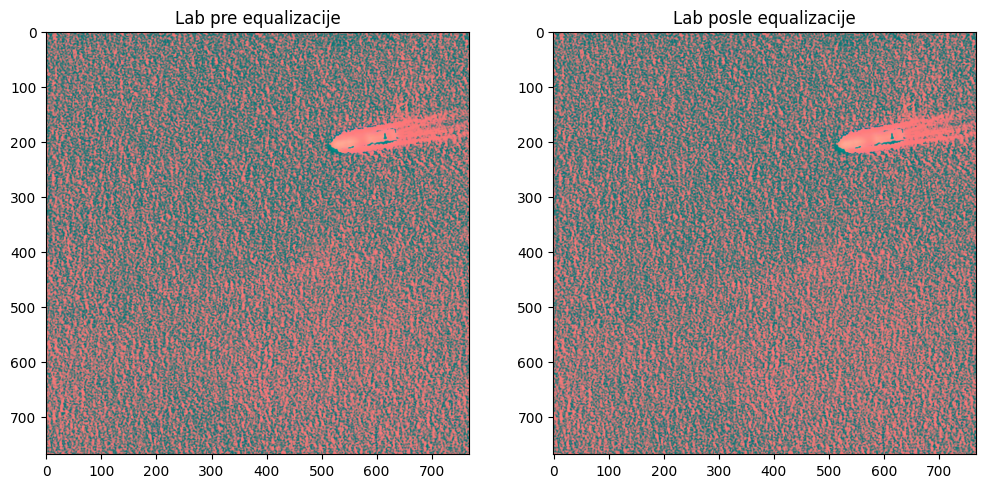

In [ ]:
def histogram_equalization(image_lab):
    # Primenjivanje equalizacije histograma na L kanal
    image_lab[:,:,0] = cv2.equalizeHist(image_lab[:,:,0]) #Ova linija primenjuje funkciju equalizeHist iz cv2 (OpenCV) biblioteke na L kanal (osvetljenost)
                                                        # slike u Lab prostoru boja. image_lab[:,:,0] pristupa samo prvom kanalu slike (kanalu osvetljenosti).
                                                        # Funkcija equalizeHist izjednačava histogram, što poboljšava kontrast slike.
    return image_lab

# Primenjivanje equalizacije histograma
image_lab_equalized = histogram_equalization(image_lab)

# Prikaz slike posle equalizacije histograma
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_lab)
plt.title("Lab pre equalizacije")
plt.subplot(1, 2, 2)
plt.imshow(image_lab_equalized)
plt.title("Lab posle equalizacije")
plt.show()


**Ova ćelija učitava slike iz zadatog direktorijuma i dodaje im šum. Cilj dodavanja šuma je da se trenira autoenkoder da ukloni šum sa slika. Takođe, slike su normalizovane na opseg [0, 1] i pripremljene za unos u neuronsku mrežu.**

In [ ]:
import os
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# Učitavanje slika i dodavanje šuma
def load_images_with_noise(path, image_ids, img_size=(128, 128)):
    images = []
    for img_id in image_ids:
        img = io.imread(os.path.join(path, img_id)) #Učitava se slika sa zadatim img_id iz direktorijuma path koristeći io.imread. Funkcija os.path.join kombinuje path i img_id u kompletnu putanju do slike.
        img = cv2.resize(img, img_size)
        noise = np.random.normal(0, 25, img.shape)#Generiše se nasumičan šum sa normalnom raspodelom (srednja vrednost 0, standardna devijacija 25) iste veličine kao slika img.
        noisy_img = img + noise #Dodaje se generisani šum slici.
        noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8) #Vrednosti piksela u slici sa šumom se ograničavaju na opseg od 0 do 255, a zatim konvertuju u tip uint8 (8-bitni celobrojni tip).
        images.append((img, noisy_img))
    return images

# Uzorak podataka za trening
train_image_ids = os.listdir(train_images_path)[:1000]   #Generiše listu prvih 1000 ID-ova slika iz direktorijuma train_images_path koristeći funkciju os.listdir.
train_images_with_noise = load_images_with_noise(train_images_path, train_image_ids)

# Priprema podataka za treniranje autoenkodera
X_train = np.array([img[1] for img in train_images_with_noise]) #Kreira se NumPy niz koji sadrži sve slike sa šumom
Y_train = np.array([img[0] for img in train_images_with_noise]) #Kreira se NumPy niz koji sadrži sve originalne slike (prvi element tuple-a) iz liste train_images_with_noise

# Normalizacija
X_train = X_train / 255.0 #Normalizuje se niz X_train tako da vrednosti piksela budu u opsegu od 0 do 1 (deljenjem sa 255).
Y_train = Y_train / 255.0

# Oblikovanje podataka za neuronsku mrežu
X_train = X_train.reshape(-1, 128, 128, 3)
Y_train = Y_train.reshape(-1, 128, 128, 3)




**Ova ćelija definiše i trenira autoenkoder. Autoenkoder je neuronska mreža koja uči da rekonstruiše ulazne podatke. Sastoji se iz dva dela: enkoder koji kompresuje ulazne podatke u manju reprezentaciju i dekoder koji rekonstruiše originalne podatke iz te reprezentacije. Autoenkoder se trenira na slikama sa šumom (X_train) i njihovim čistim verzijama (Y_train).**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Definisanje modela autoenkodera
input_img = Input(shape=(128, 128, 3)) #Kreira ulazni sloj što odgovara slikama veličine 128x128 piksela sa tri kanala (RGB).

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img) # Dodaje konvolucijski sloj sa 64 filtera veličine 3x3, relu aktivacijom i same paddingom (dodavanje nula na ivice kako bi izlaz imao iste dimenzije kao ulaz). Sloj se povezuje sa ulaznim slojem input_img.
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) #Dodaje još jedan konvolucijski sloj sa 32 filtera veličine 3x3, relu aktivacijom i same paddingom. Sloj se povezuje sa prethodnim slojem x.
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded) #Dodaje konvolucijski sloj sa 32 filtera veličine 3x3, relu aktivacijom i same paddingom, povezujući se sa enkodiranim reprezentom encoded.
x = UpSampling2D((2, 2))(x) #Dodaje sloj uzorkovanja sa veličinom prozora 2x2, koji povećava dimenzije slike dupliranjem visine i širine.
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # Kompajlira model koristeći adam optimizer (efikasan i često korišćen optimizer za treniranje neuronskih mreža) i binary_crossentropy funkciju gubitka (često korišćena za binarne klasifikacije, a ovde koristi jer je izlaz normalizovan na vrednosti između 0 i 1).

# Pregled modela
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248  

In [ ]:
# Trening autoenkodera
autoencoder.fit(X_train, Y_train,
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_split=0.2)


Epoch 1/5
25/25 [==============================] - 94s 4s/step - loss: 0.5826 - val_loss: 0.5104
Epoch 2/5
25/25 [==============================] - 86s 3s/step - loss: 0.5040 - val_loss: 0.4980
Epoch 3/5
25/25 [==============================] - 87s 3s/step - loss: 0.4923 - val_loss: 0.4931
Epoch 4/5
25/25 [==============================] - 95s 4s/step - loss: 0.4890 - val_loss: 0.4903
Epoch 5/5
25/25 [==============================] - 88s 4s/step - loss: 0.4877 - val_loss: 0.4896




**Ova ćelija učitava test slike, dodaje im šum, i koristi trenirani autoenkoder za uklanjanje šuma. Prikazuje originalne slike, slike sa šumom, i denoised slike kako bi se vizuelno procenila efikasnost autoenkodera.**

1/1 [==============================] - 0s 221ms/step


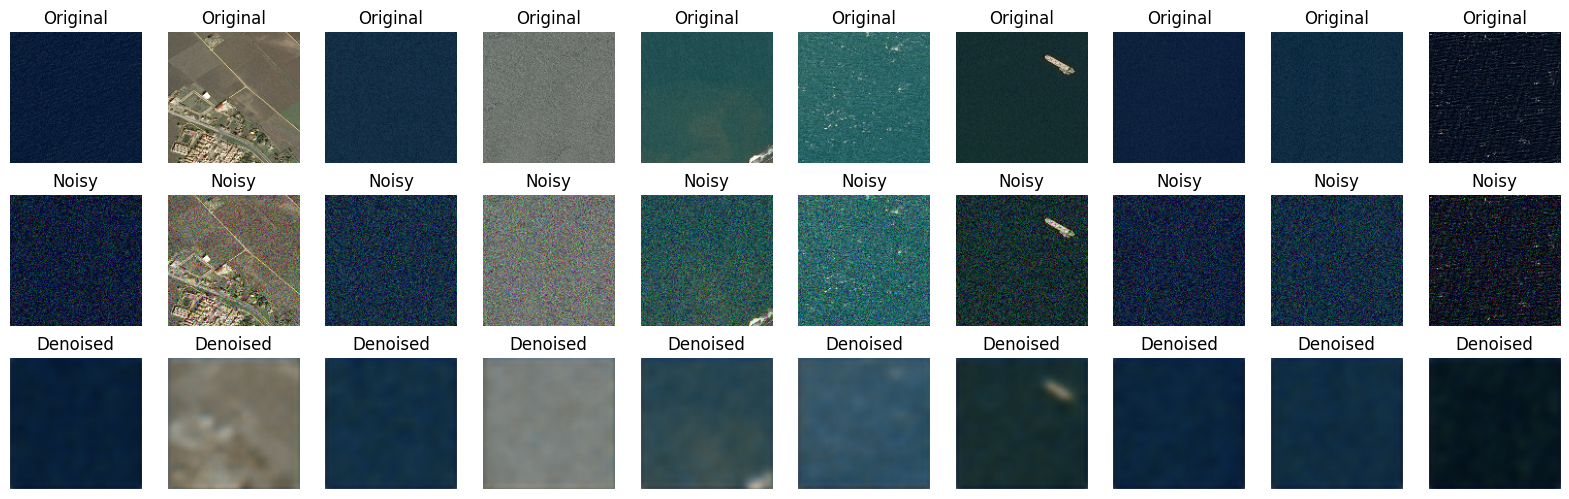

In [ ]:
# Učitavanje test slika i dodavanje šuma
test_image_ids = os.listdir(test_images_path)[:10]  # Uzmimo 10 slika za testiranje
test_images_with_noise = load_images_with_noise(test_images_path, test_image_ids)

# Priprema podataka za testiranje
X_test = np.array([img[1] for img in test_images_with_noise])
Y_test = np.array([img[0] for img in test_images_with_noise])

# Normalizacija
X_test = X_test / 255.0
Y_test = Y_test / 255.0

# Oblikovanje podataka za neuronsku mrežu
X_test = X_test.reshape(-1, 128, 128, 3)
Y_test = Y_test.reshape(-1, 128, 128, 3)

# Primena autoenkodera na test set
decoded_imgs = autoencoder.predict(X_test)

# Prikaz originalnih, noisy i denoised slika
n = 10  # Broj slika za prikaz
plt.figure(figsize=(20, 6))
for i in range(n):
    # Originalne slike
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(Y_test[i].reshape(128, 128, 3))
    plt.title("Original")
    plt.axis("off")

    # Noisy slike
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test[i].reshape(128, 128, 3))
    plt.title("Noisy")
    plt.axis("off")

    # Denoised slike
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(128, 128, 3))
    plt.title("Denoised")
    plt.axis("off")
plt.show()


**Učitavanje anotacija iz CSV fajla, Ova ćelija učitava CSV fajl sa anotacijama koje sadrže ImageId i EncodedPixels. Funkcija rle_decode konvertuje RLE kodove (run-length encoding) u binarnu masku. Primer kreiranja maske za jednu sliku. Učitava jednu sliku i odgovarajuće anotacije, kreira masku i prikazuje originalnu sliku i masku.**

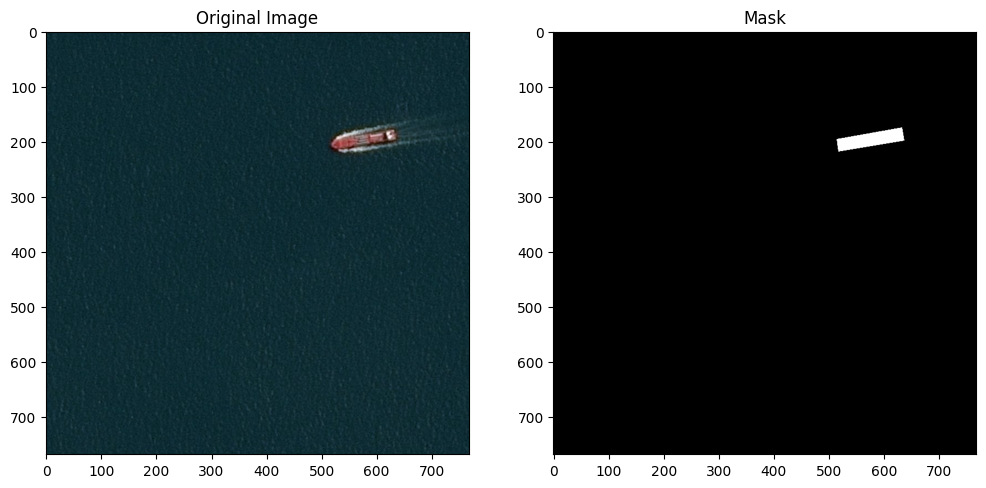

In [ ]:
import pandas as pd

# Učitajmo CSV fajl sa anotacijama
annotations_path = '/content/Ships_Detection/Ships_Detection/train_ship_segmentations_v2.csv'
annotations = pd.read_csv(annotations_path)

def rle_decode(mask_rle, shape):
    """
    mask_rle: run-length as string formated (start length)
    shape: (height, width) of array to return
    Returns numpy array, 1 - mask, 0 - background
    """
    s = mask_rle.split() #Deli RLE string na liste startova i dužina.
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])] #Pretvara startove i dužine u numpy nizove. s[0:][::2] uzima svaku drugu vrednost počevši od prve (startovi), a s[1:][::2] uzima svaku drugu vrednost počevši od druge (dužine).
    starts -= 1
    ends = starts + lengths #Izračunava krajeve segmenata
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8) # Kreira praznu sliku (jednodimenzionalni niz) sa svim pikselima postavljenim na 0.
    for lo, hi in zip(starts, ends): # Iterira kroz parove startova i krajeva.

        img[lo:hi] = 1 # Postavlja piksele u odgovarajućim segmentima na 1.
    return img.reshape(shape).T #Vraća dekodiranu masku kao 2D numpy niz transponovan kako bi odgovarao originalnim dimenzijama slike.

# Primer kako kreirati masku za jednu sliku
sample_image_id = '0bdbed88b.jpg'
sample_annotations = annotations[annotations['ImageId'] == sample_image_id]['EncodedPixels']
sample_image_path = train_images_path + sample_image_id

image = io.imread(sample_image_path)
mask = np.zeros((image.shape[0], image.shape[1]))

for encoded_pixels in sample_annotations: #Iterira kroz RLE kodove za uzorak slike.
    if pd.isna(encoded_pixels):
        continue
    mask += rle_decode(encoded_pixels, image.shape[:2]) #Dekodira RLE kod i dodaje ga maski.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.show()


**Funkcija za kreiranje maski za sve slike. Ova funkcija kreira maske za sve slike u trening setu. Maske se takođe skaliraju na veličinu 128x128. Priprema maski za trening i test set, normalizuju ih i oblikuju za neuronsku mrežu.**

In [ ]:
# Kreiranje maski za sve slike u trening setu
def create_masks(image_ids, annotations, image_path):
    masks = []
    for img_id in image_ids:
        img_path = os.path.join(image_path, img_id)
        image = io.imread(img_path)
        mask = np.zeros((image.shape[0], image.shape[1])) #mask se inicijalizira kao niz nula dimenzija (image.shape[0], image.shape[1]), što odgovara dimenzijama učitane slike.
        img_annotations = annotations[annotations['ImageId'] == img_id]['EncodedPixels'] #img_annotations sadrži podatke o kodiranim pikselima (EncodedPixels) za trenutnu sliku iz DataFrame-a annotations.

        for encoded_pixels in img_annotations: #koristi se funkcija rle_decode(encoded_pixels, image.shape[:2]) za dekodiranje i dodavanje kodiranih piksela u masku.
            if pd.isna(encoded_pixels):
                continue
            mask += rle_decode(encoded_pixels, image.shape[:2])
        mask = cv2.resize(mask, (128, 128))  # Resize mask to match the input size of the autoencoder
        masks.append(mask)
    return np.array(masks)

# Priprema maski za trening set
train_masks = create_masks(train_image_ids, annotations, train_images_path)
train_masks = train_masks / 255.0  # Normalizacija Nakon što su maske izrađene za sve slike, normaliziraju se vrijednosti na raspon [0, 1] dijeljenjem sa 255.0
train_masks = train_masks.reshape(-1, 128, 128, 1)  # Oblikovanje podataka za neuronsku mrežu

# Priprema maski za test set
test_masks = create_masks(test_image_ids, annotations, test_images_path)
test_masks = test_masks / 255.0  # Normalizacija
test_masks = test_masks.reshape(-1, 128, 128, 1)  # Oblikovanje podataka za neuronsku mrežu


**Definisanje modela autoenkodera. Ova ćelija definiše i kompajlira model autoenkodera sa maskama kao dodatnim ulazom. Trening modela autenkodera sa maskama.**

In [ ]:
from tensorflow.keras.layers import concatenate, Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model

# Definisanje modela autoenkodera sa maskama kao dodatnim ulazom
input_img = Input(shape=(128, 128, 3))
input_mask = Input(shape=(128, 128, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = concatenate([x, input_mask], axis=3)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_with_mask = Model(inputs=[input_img, input_mask], outputs=decoded)
autoencoder_with_mask.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Pregled modela
autoencoder_with_mask.summary()

# Trening autoenkodera sa maskama
history = autoencoder_with_mask.fit([X_train, train_masks], Y_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.2)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 32)         896       ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 128, 128, 33)         0         ['conv2d_5[0][0]',            
                                                                     'input_3[0][0]']       


**Prikazivanje gubitka i tačnosti tokom obučavanja**

Ova ćelija prikazuje grafikone gubitka i tačnosti tokom epoha obučavanja.



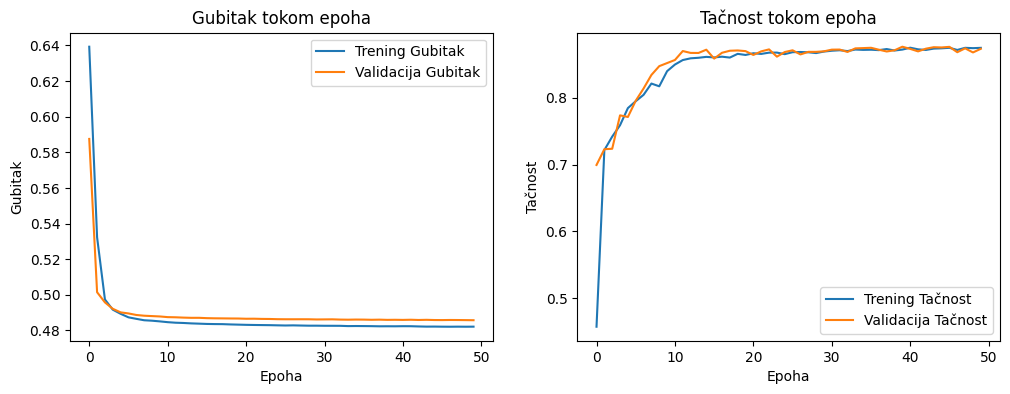

loss: [0.639299213886261, 0.5323147177696228, 0.49738574028015137, 0.49165549874305725, 0.489329069852829, 0.4873526692390442, 0.4865052402019501, 0.485709011554718, 0.48545897006988525, 0.48507624864578247, 0.4846351146697998, 0.48433244228363037, 0.48418426513671875, 0.48395106196403503, 0.4838005006313324, 0.4836391806602478, 0.48356422781944275, 0.48352745175361633, 0.48336562514305115, 0.4832507371902466, 0.48313620686531067, 0.48306038975715637, 0.4830041527748108, 0.4829544126987457, 0.48285752534866333, 0.4827710688114166, 0.4828397333621979, 0.48274487257003784, 0.482661634683609, 0.4826647639274597, 0.4826074242591858, 0.4825998544692993, 0.4825853705406189, 0.48243117332458496, 0.48247015476226807, 0.48244035243988037, 0.4823952913284302, 0.48231399059295654, 0.48233550786972046, 0.4823170602321625, 0.4823763966560364, 0.4823586344718933, 0.4822326898574829, 0.4821357727050781, 0.48215824365615845, 0.4821058213710785, 0.48207932710647583, 0.4821164309978485, 0.48208332061767

In [ ]:
import matplotlib.pyplot as plt

# Prikazivanje gubitka i tačnosti tokom obučavanja
plt.figure(figsize=(12, 4))

# Gubitak (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Trening Gubitak')
plt.plot(history.history['val_loss'], label='Validacija Gubitak')
plt.title('Gubitak tokom epoha')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.legend()

# Tačnost (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Trening Tačnost')
plt.plot(history.history['val_accuracy'], label='Validacija Tačnost')
plt.title('Tačnost tokom epoha')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.legend()

plt.show()

# Summary istorije
for key in history.history.keys():
    print(f"{key}: {history.history[key]}")
